In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 1465s 9us/step


In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

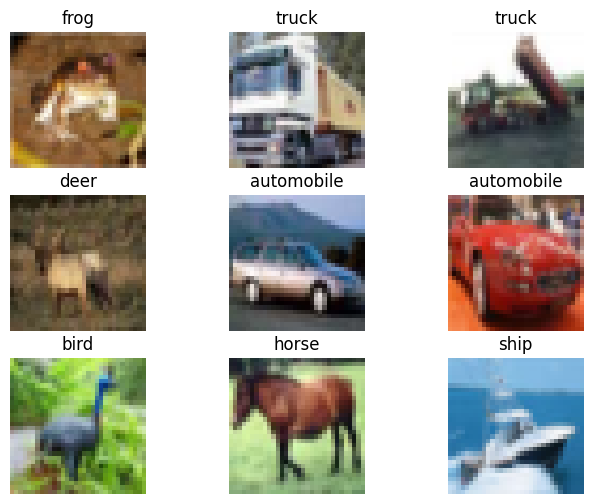

In [6]:
plt.figure(figsize=(8, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()


In [7]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(datagen.flow(x_train, y_train_cat, batch_size=64),
                    epochs=20,
                    validation_data=(x_test, y_test_cat))

Epoch 1/20
782/782 [==============================] - 38s 48ms/step - loss: 1.7848 - accuracy: 0.3362 - val_loss: 1.4824 - val_accuracy: 0.4751
Epoch 2/20
782/782 [==============================] - 56s 72ms/step - loss: 1.4580 - accuracy: 0.4724 - val_loss: 1.2853 - val_accuracy: 0.5419
Epoch 3/20
782/782 [==============================] - 62s 79ms/step - loss: 1.3404 - accuracy: 0.5219 - val_loss: 1.1756 - val_accuracy: 0.5757
Epoch 4/20
782/782 [==============================] - 62s 79ms/step - loss: 1.2652 - accuracy: 0.5544 - val_loss: 1.1136 - val_accuracy: 0.5987
Epoch 5/20
782/782 [==============================] - 63s 80ms/step - loss: 1.1916 - accuracy: 0.5808 - val_loss: 1.0051 - val_accuracy: 0.6426
Epoch 6/20
782/782 [==============================] - 63s 80ms/step - loss: 1.1358 - accuracy: 0.6032 - val_loss: 0.9618 - val_accuracy: 0.6566
Epoch 7/20
782/782 [==============================] - 62s 79ms/step - loss: 1.0929 - accuracy: 0.6185 - val_loss: 0.9593 - val_accuracy:

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print("✅ Test Accuracy:", test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.8011 - accuracy: 0.7240
✅ Test Accuracy: 0.7239999771118164


In [12]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Model Accuracy')

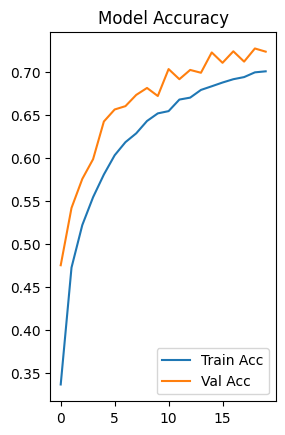

In [13]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Model Accuracy")

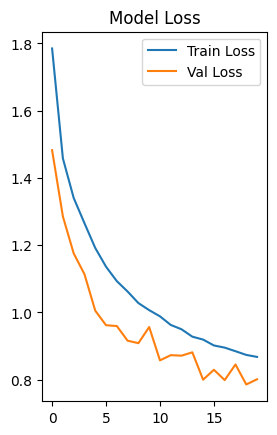

In [14]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

313/313 [==============================] - 2s 6ms/step


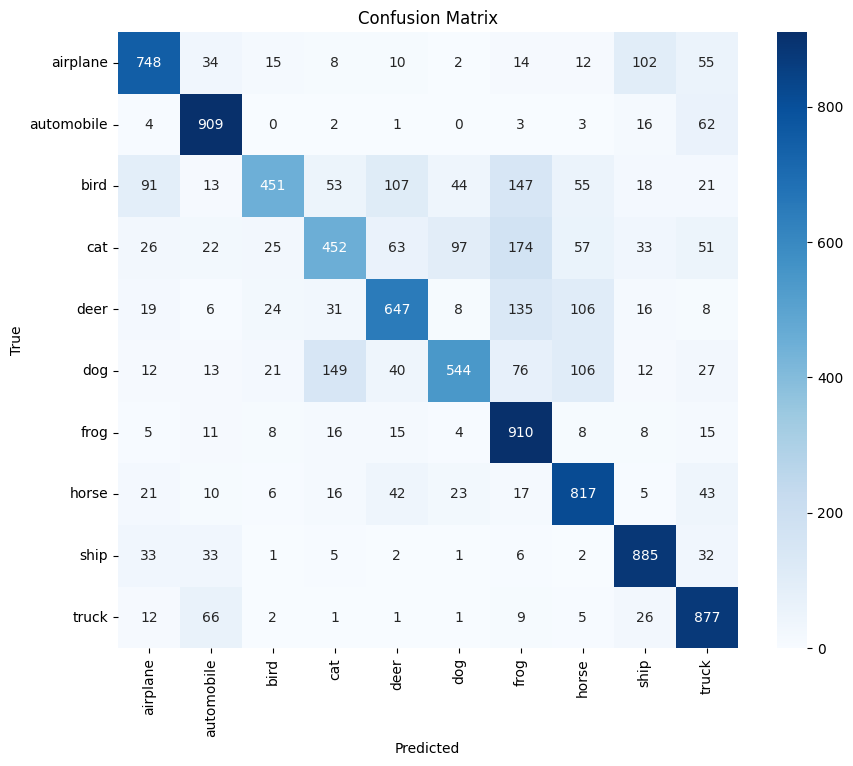

In [15]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.reshape(-1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [16]:
print(classification_report(y_true, y_pred_classes, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.77      0.75      0.76      1000
  automobile       0.81      0.91      0.86      1000
        bird       0.82      0.45      0.58      1000
         cat       0.62      0.45      0.52      1000
        deer       0.70      0.65      0.67      1000
         dog       0.75      0.54      0.63      1000
        frog       0.61      0.91      0.73      1000
       horse       0.70      0.82      0.75      1000
        ship       0.79      0.89      0.83      1000
       truck       0.74      0.88      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.71     10000
weighted avg       0.73      0.72      0.71     10000

